In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from datetime import datetime

In [3]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()
from nltk.corpus import wordnet

In [4]:
df=pd.read_csv('reddit_opinion_PSE_ISR.csv', encoding='latin1')

/var/folders/n1/z1j67qb53g1g2y___dq2dhy00000gn/T/ipykernel_91368/151289139.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('reddit_opinion_PSE_ISR.csv', encoding='latin1')


In [5]:
df.columns

Index(['comment_id', 'score', 'self_text', 'subreddit', 'created_time',
       'post_id', 'author_name', 'controversiality', 'ups', 'downs',
       'user_is_verified', 'user_account_created_time', 'user_awardee_karma',
       'user_awarder_karma', 'user_link_karma', 'user_comment_karma',
       'user_total_karma', 'post_score', 'post_self_text', 'post_title',
       'post_upvote_ratio', 'post_thumbs_ups', 'post_total_awards_received',
       'post_created_time'],
      dtype='object')

In [6]:
df.dtypes

comment_id                     object
score                           int64
self_text                      object
subreddit                      object
created_time                   object
post_id                        object
author_name                    object
controversiality                int64
ups                             int64
downs                           int64
user_is_verified               object
user_account_created_time      object
user_awardee_karma            float64
user_awarder_karma            float64
user_link_karma               float64
user_comment_karma            float64
user_total_karma              float64
post_score                      int64
post_self_text                 object
post_title                     object
post_upvote_ratio             float64
post_thumbs_ups                 int64
post_total_awards_received      int64
post_created_time              object
dtype: object

In [7]:
df.shape

(2496456, 24)

In [8]:
df.head(2)

,comment_id,score,self_text,subreddit,created_time,post_id,author_name,controversiality,ups,downs,...,user_link_karma,user_comment_karma,user_total_karma,post_score,post_self_text,post_title,post_upvote_ratio,post_thumbs_ups,post_total_awards_received,post_created_time
0,miryacx,1,Hahahahah. Okay 20 âArab countriesââ¦ dud...,IsraelPalestine,2025-03-20 11:06:27,1jfl54o,ButterscotchThis5023,0,1,0,...,1.0,-17.0,-16.0,9,This is more of a rant. But yes Iâm an Arab(...,Iâm an Arab Jew living in America,0.74,9,0,2025-03-20 09:43:06
1,miry94o,1,You forgot the blockade lift was also taken aw...,IsraelPalestine,2025-03-20 11:06:09,1jfjx8s,Evening_Music9033,0,1,0,...,1.0,2233.0,2234.0,0,"After more than a year of conflict, a ceasefir...",Israel and their blatant ceasefire violations,0.37,0,0,2025-03-20 08:06:53


In [9]:
# Convert 'created_time' and 'post_created_time' to datetime format
df['created_time'] = pd.to_datetime(df['created_time'], errors='coerce')
df['post_created_time'] = pd.to_datetime(df['post_created_time'], errors='coerce')

In [10]:
# Convert text columns to string
df['self_text'] = df['self_text'].astype(str)
df['post_self_text'] = df['post_self_text'].astype(str)
df['post_title'] = df['post_title'].astype(str)

In [11]:
df = df[df['self_text'].str.strip() != '']
df = df[df['self_text'].str.len() > 20] 
df = df[df['post_self_text'].str.strip() != '']
df = df[df['post_self_text'].str.len() > 20] 

In [12]:
start_date = pd.to_datetime("2023-01-01")
end_date = pd.to_datetime("2024-07-31")
data = df[(df['created_time'] >= start_date) & (df['created_time'] <= end_date)]
data.reset_index(drop=True, inplace=True)
data.shape

(709940, 24)

In [13]:
content = data[[ 'comment_id', 'self_text', 'created_time']]

In [14]:
content.head(5)

,comment_id,self_text,created_time
0,lfqhets,Have you ever read Hamas mission statement fro...,2024-07-31 00:00:00
1,lfqhbzr,You canât achieve zero casualties. But you ...,2024-07-30 23:59:31
2,lfqhb8g,You believe helping terrorists will serve your...,2024-07-30 23:59:23
3,lfqh7c9,"They'll commit the worst genocide ever, then t...",2024-07-30 23:58:42
4,lfqh6tr,"25,000 is a long shot. It took about 3000 Hama...",2024-07-30 23:58:37


In [15]:
content['text-lower']=content['self_text'].str.lower()

/var/folders/n1/z1j67qb53g1g2y___dq2dhy00000gn/T/ipykernel_91368/1270208230.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  content['text-lower']=content['self_text'].str.lower()


In [16]:
stop=stopwords.words('english')
stop.extend(['http', 'https', 'www', 'amp', 'com', 'would', 'rt'])
content['stopword']=content['text-lower'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop]))
content['stop_tokenized']=content['stopword'].apply(word_tokenize)

/var/folders/n1/z1j67qb53g1g2y___dq2dhy00000gn/T/ipykernel_91368/3161556905.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  content['stopword']=content['text-lower'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop]))
/var/folders/n1/z1j67qb53g1g2y___dq2dhy00000gn/T/ipykernel_91368/3161556905.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  content['stop_tokenized']=content['stopword'].apply(word_tokenize)


In [17]:
content['punct_tokenized']=content['stop_tokenized'].apply(lambda x: [word for word in x if word.isalnum()])

/var/folders/n1/z1j67qb53g1g2y___dq2dhy00000gn/T/ipykernel_91368/34118249.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  content['punct_tokenized']=content['stop_tokenized'].apply(lambda x: [word for word in x if word.isalnum()])


In [18]:
def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'): #ADJECTIVE
        return wordnet.ADJ
    elif nltk_tag.startswith('V'): #VERB
        return wordnet.VERB
    elif nltk_tag.startswith('N'): #NOUN        
        return wordnet.NOUN
    elif nltk_tag.startswith('R'): #ADVERB
        return wordnet.ADV
    else:          
        return None

In [19]:
def lemmatize_sentence(sentence):
    # Tokenize the sentence and find the POS tag for each token
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))  
    # Tuple of (token, wordnet_tag)
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged) 
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            # If no tag was found, then use the word as is
            lemmatized_sentence.append(word)
        else:        
            # Else use the tag to lemmatize the word
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
    return " ".join(lemmatized_sentence)

In [20]:
content['lemma']=content['punct_tokenized'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])
content['lemmatizer_str']=content['lemma'].apply(lambda x: lemmatize_sentence(' '.join(x)))
content['lemmatizer_token']=content['lemmatizer_str'].apply(word_tokenize)

/var/folders/n1/z1j67qb53g1g2y___dq2dhy00000gn/T/ipykernel_91368/430295099.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  content['lemma']=content['punct_tokenized'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])
/var/folders/n1/z1j67qb53g1g2y___dq2dhy00000gn/T/ipykernel_91368/430295099.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  content['lemmatizer_str']=content['lemma'].apply(lambda x: lemmatize_sentence(' '.join(x)))
/var/folders/n1/z1j67qb53g1g2y___dq2dhy00000gn/T/ipykernel_913

In [21]:
import gensim
from gensim import corpora
from gensim.models.ldamodel import LdaModel

In [22]:
content['token'] = content['lemmatizer_token']

/var/folders/n1/z1j67qb53g1g2y___dq2dhy00000gn/T/ipykernel_91368/640301550.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  content['token'] = content['lemmatizer_token']


In [23]:
dictionary = corpora.Dictionary(content['token'])

In [24]:
id2word=corpora.Dictionary(content['token'])

In [25]:
corpus=[id2word.doc2bow(text) for text in content['token']]

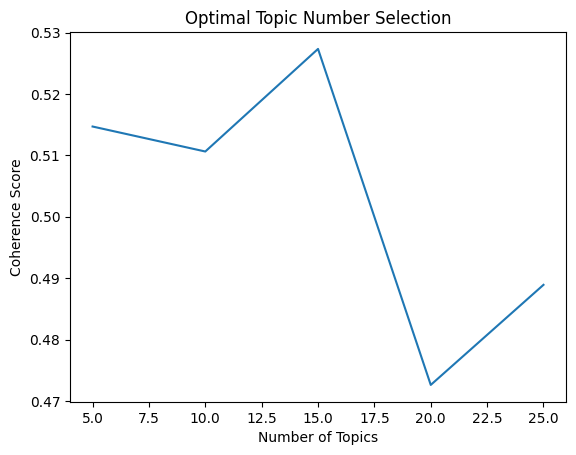

✅ 最佳主题数：15


In [26]:
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt

def compute_coherence_values(dictionary, corpus, texts, start, limit, step):
    coherence_values = []
    model_list = []
    
    for num_topics in range(start, limit, step):
        model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, random_state=123, passes=5)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    
    return model_list, coherence_values

# 使用举例：尝试从 5 到 25 个主题，每隔 5 个评估一次
model_list, coherence_values = compute_coherence_values(
    dictionary=dictionary, 
    corpus=corpus, 
    texts=content['token'], 
    start=5, 
    limit=26, 
    step=5
)

# 绘图查看效果
x = range(5, 26, 5)
plt.plot(x, coherence_values)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.title("Optimal Topic Number Selection")
plt.show()

# 找到最佳主题数（最大 Coherence 对应的）
best_index = coherence_values.index(max(coherence_values))
best_model = model_list[best_index]
best_topic_num = x[best_index]

print(f"✅ 最佳主题数：{best_topic_num}")

In [27]:
NUM_TOPICS = 15
lda_model = LdaModel(
    corpus=corpus,
    id2word=dictionary,
    num_topics=NUM_TOPICS,
    random_state=123,
    passes=10,
    alpha='auto',
    per_word_topics=True
)

In [28]:
from pprint import pprint
pprint(lda_model.print_topics())

[(0,
  '0.062*"british" + 0.049*"massacre" + 0.029*"empire" + 0.029*"ottoman" + '
  '0.020*"electricity" + 0.019*"mandate" + 0.017*"convention" + 0.014*"geneva" '
  '+ 0.013*"town" + 0.013*"rock"'),
 (1,
  '0.219*"http" + 0.090*"amp" + 0.074*"video" + 0.050*"source" + 0.027*"news" '
  '+ 0.024*"link" + 0.024*"report" + 0.024*"article" + 0.018*"x200b" + '
  '0.015*"fake"'),
 (2,
  '0.082*"jew" + 0.049*"arab" + 0.046*"land" + 0.041*"palestine" + '
  '0.038*"state" + 0.038*"jewish" + 0.031*"live" + 0.019*"palestinian" + '
  '0.018*"zionist" + 0.014*"right"'),
 (3,
  '0.108*"post" + 0.074*"comment" + 0.055*"lol" + 0.046*"dont" + 0.031*"thank" '
  '+ 0.027*"thats" + 0.026*"sub" + 0.026*"im" + 0.025*"op" + 0.022*"reddit"'),
 (4,
  '0.028*"support" + 0.017*"group" + 0.015*"conflict" + 0.011*"part" + '
  '0.009*"action" + 0.008*"issue" + 0.008*"protest" + 0.008*"also" + '
  '0.008*"rule" + 0.008*"government"'),
 (5,
  '0.067*"fuck" + 0.060*"god" + 0.059*"man" + 0.045*"na" + 0.037*"wait" + '
  

In [29]:
def get_dominant_topic(bow):
    topic_probs = lda_model.get_document_topics(bow)
    return max(topic_probs, key=lambda x: x[1])[0] if topic_probs else None

content['topic'] = [get_dominant_topic(bow) for bow in corpus]

/var/folders/n1/z1j67qb53g1g2y___dq2dhy00000gn/T/ipykernel_91368/1219045161.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  content['topic'] = [get_dominant_topic(bow) for bow in corpus]


In [30]:
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

pyLDAvis.enable_notebook()
vis_data = gensimvis.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(vis_data)

In [31]:
pyLDAvis.save_html(vis_data, 'lda_visualization.html')

In [32]:
from gensim.models.nmf import Nmf

In [33]:
nmf = Nmf(corpus=corpus, id2word=id2word, num_topics=15,random_state=123)

/opt/anaconda3/envs/IS6755/lib/python3.10/site-packages/gensim/models/nmf.py:578: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/envs/IS6755/lib/python3.10/site-packages/gensim/models/nmf.py:607: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/envs/IS6755/lib/python3.10/site-packages/gensim/models/nmf.py:620: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/envs/IS6755/lib/python3.10/site-packages/gensim/models/nmf.py:620: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  

In [34]:
from pprint import pprint
pprint(nmf.print_topics())

[(0,
  '0.072*"land" + 0.015*"u" + 0.014*"make" + 0.011*"take" + 0.010*"give" + '
  '0.008*"year" + 0.008*"back" + 0.008*"go" + 0.008*"time" + 0.008*"get"'),
 (1,
  '0.124*"say" + 0.010*"that" + 0.008*"thing" + 0.007*"it" + 0.007*"â" + '
  '0.006*"point" + 0.006*"also" + 0.006*"go" + 0.006*"mean" + 0.006*"know"'),
 (2,
  '0.123*"state" + 0.026*"jewish" + 0.020*"israel" + 0.017*"solution" + '
  '0.013*"one" + 0.012*"two" + 0.010*"palestine" + 0.005*"zionist" + '
  '0.005*"want" + 0.005*"law"'),
 (3,
  '0.078*"right" + 0.048*"country" + 0.023*"want" + 0.012*"israel" + '
  '0.012*"palestine" + 0.011*"palestinian" + 0.009*"human" + 0.009*"law" + '
  '0.008*"support" + 0.008*"return"'),
 (4,
  '0.129*"arab" + 0.022*"palestine" + 0.017*"jewish" + 0.011*"british" + '
  '0.009*"population" + 0.009*"country" + 0.007*"land" + 0.006*"1948" + '
  '0.006*"ottoman" + 0.006*"jordan"'),
 (5,
  '0.101*"war" + 0.020*"civilian" + 0.013*"crime" + 0.010*"start" + '
  '0.009*"genocide" + 0.007*"military" + 

In [35]:
from gensim.models.word2vec import Word2Vec
import gensim.downloader
vector=gensim.downloader.load('word2vec-google-news-300')

In [36]:
from gensim import models
vector=models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)

In [37]:
model=Word2Vec([row for row in content['token']], vector_size=100, min_count=1, window=3)

In [38]:
pprint(nmf.print_topics())

[(0,
  '0.072*"land" + 0.015*"u" + 0.014*"make" + 0.011*"take" + 0.010*"give" + '
  '0.008*"year" + 0.008*"back" + 0.008*"go" + 0.008*"time" + 0.008*"get"'),
 (1,
  '0.124*"say" + 0.010*"that" + 0.008*"thing" + 0.007*"it" + 0.007*"â" + '
  '0.006*"point" + 0.006*"also" + 0.006*"go" + 0.006*"mean" + 0.006*"know"'),
 (2,
  '0.123*"state" + 0.026*"jewish" + 0.020*"israel" + 0.017*"solution" + '
  '0.013*"one" + 0.012*"two" + 0.010*"palestine" + 0.005*"zionist" + '
  '0.005*"want" + 0.005*"law"'),
 (3,
  '0.078*"right" + 0.048*"country" + 0.023*"want" + 0.012*"israel" + '
  '0.012*"palestine" + 0.011*"palestinian" + 0.009*"human" + 0.009*"law" + '
  '0.008*"support" + 0.008*"return"'),
 (4,
  '0.129*"arab" + 0.022*"palestine" + 0.017*"jewish" + 0.011*"british" + '
  '0.009*"population" + 0.009*"country" + 0.007*"land" + 0.006*"1948" + '
  '0.006*"ottoman" + 0.006*"jordan"'),
 (5,
  '0.101*"war" + 0.020*"civilian" + 0.013*"crime" + 0.010*"start" + '
  '0.009*"genocide" + 0.007*"military" + 

In [39]:
from collections import Counter

In [40]:
Counter([item for row in content['lemmatizer_token'] for item in row]).most_common(10)

[('israel', 367013),
 ('people', 229860),
 ('palestinian', 225265),
 ('hamas', 195255),
 ('say', 154756),
 ('jew', 145209),
 ('like', 137858),
 ('israeli', 131090),
 ('think', 124241),
 ('one', 115563)]

In [41]:
from gensim.models import KeyedVectors
model.wv.most_similar(positive=['israel'], topn=10)

[('isreal', 0.8530958294868469),
 ('palestinian', 0.7329033017158508),
 ('israeli', 0.6696505546569824),
 ('hamas', 0.6587743759155273),
 ('palestine', 0.6581876277923584),
 ('simply', 0.6424795389175415),
 ('u', 0.6418817639350891),
 ('country', 0.6403222680091858),
 ('them', 0.6360397338867188),
 ('continue', 0.6234049797058105)]

In [42]:
model.wv.most_similar(positive=['palestinian'], topn=10)

[('israeli', 0.7503107190132141),
 ('israel', 0.7329034209251404),
 ('palestine', 0.7062790393829346),
 ('gazans', 0.6812530159950256),
 ('people', 0.6594842076301575),
 ('palestinans', 0.6577858924865723),
 ('gazan', 0.6279312968254089),
 ('arab', 0.6244285106658936),
 ('jew', 0.6139974594116211),
 ('palastinians', 0.6028583645820618)]

In [43]:
model.wv.most_similar(positive=['hamas'], topn=10)

[('hammas', 0.8349974155426025),
 ('idf', 0.708469808101654),
 ('israel', 0.6587743759155273),
 ('terrorist', 0.642396092414856),
 ('gaza', 0.621013879776001),
 ('gazans', 0.6128364205360413),
 ('hezbollah', 0.589634120464325),
 ('fatah', 0.5859372615814209),
 ('isreal', 0.5822010040283203),
 ('militant', 0.5808233022689819)]

In [44]:
model.wv.most_similar(positive=['jew'], topn=10)

[('muslim', 0.7018026113510132),
 ('arab', 0.6998596787452698),
 ('jewish', 0.6450521945953369),
 ('people', 0.638948380947113),
 ('mizrahim', 0.6168162822723389),
 ('christian', 0.6140432357788086),
 ('palestinian', 0.6139973998069763),
 ('irsraelis', 0.6021081805229187),
 ('expelled', 0.5751306414604187),
 ('minority', 0.5748404860496521)]

In [45]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [46]:
# 🗓️ 创建一个按月的时间列
content['month'] = content['created_time'].dt.to_period('M').astype(str)

/var/folders/n1/z1j67qb53g1g2y___dq2dhy00000gn/T/ipykernel_91368/76406943.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  content['month'] = content['created_time'].dt.to_period('M').astype(str)


In [47]:
# 统计每月每个主题的出现次数
topic_time_df = content.groupby(['month', 'topic']).size().unstack(fill_value=0)

In [48]:
topic_time_df

topic,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
month,,,,,,,,,,,,,,,
2023-09,0,0,0,0,0,0,0,0,528,0,0,1,0,0,0
2023-10,0,9,13,0,3,2,0,9,3894,2,2,53,0,0,0
2023-11,3,114,1658,34,784,2,3,331,129893,90,23,5318,52,2,13
2023-12,16,109,1641,116,747,1,2,320,113254,96,39,5561,54,2,19
2024-01,9,81,1129,100,756,2,2,121,73294,51,34,3482,26,0,9
2024-02,6,93,995,68,417,0,1,98,56982,36,18,2538,26,0,14
2024-03,4,130,962,25,448,2,3,92,59909,57,13,2612,23,0,9
2024-04,12,145,925,52,432,1,1,121,59999,40,26,2528,19,1,10
2024-05,11,161,1272,2,638,1,0,164,75002,74,26,3544,31,1,13


In [49]:
# 按时间顺序排序
topic_time_df = topic_time_df.sort_index()

In [52]:
from scipy.stats import zscore

topic_zscores_df = topic_time_df.apply(zscore, axis=0)

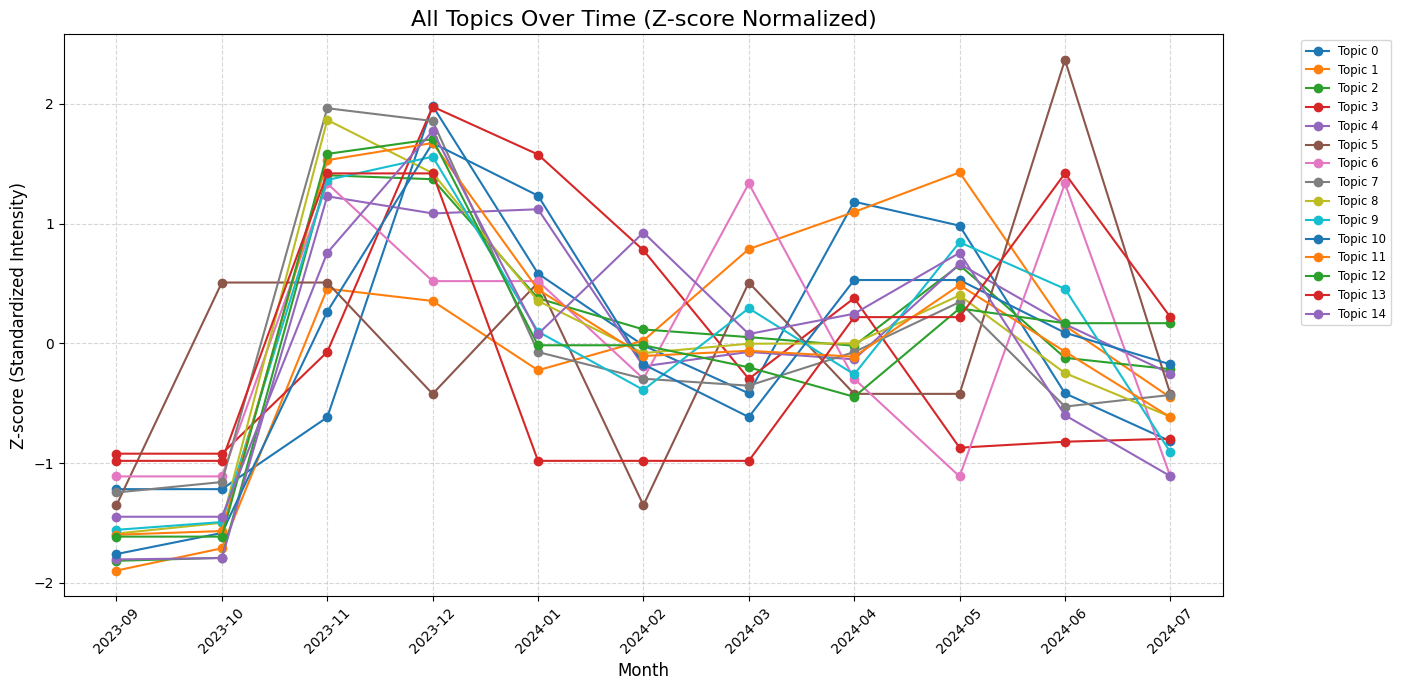

In [54]:
# 自动获取所有 topic 列（假设 topic 列是数字）
focused_topics = topic_zscores_df.columns.tolist()

# 如果没有特别的标签，用编号作为默认 label
topic_labels = {i: f"Topic {i}" for i in focused_topics}

# 绘图
plt.figure(figsize=(14, 7))

for topic in focused_topics:
    label = topic_labels.get(topic, f"Topic {topic}")
    plt.plot(topic_zscores_df.index, topic_zscores_df[topic], marker='o', label=label)

plt.title("All Topics Over Time (Z-score Normalized)", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Z-score (Standardized Intensity)", fontsize=12)
plt.xticks(rotation=45)
plt.legend(loc='upper right', fontsize='small', bbox_to_anchor=(1.15, 1.0))  # 图例挪出图外
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig("All_Topics_Zscore_Timeline.png", dpi=300)
plt.show()


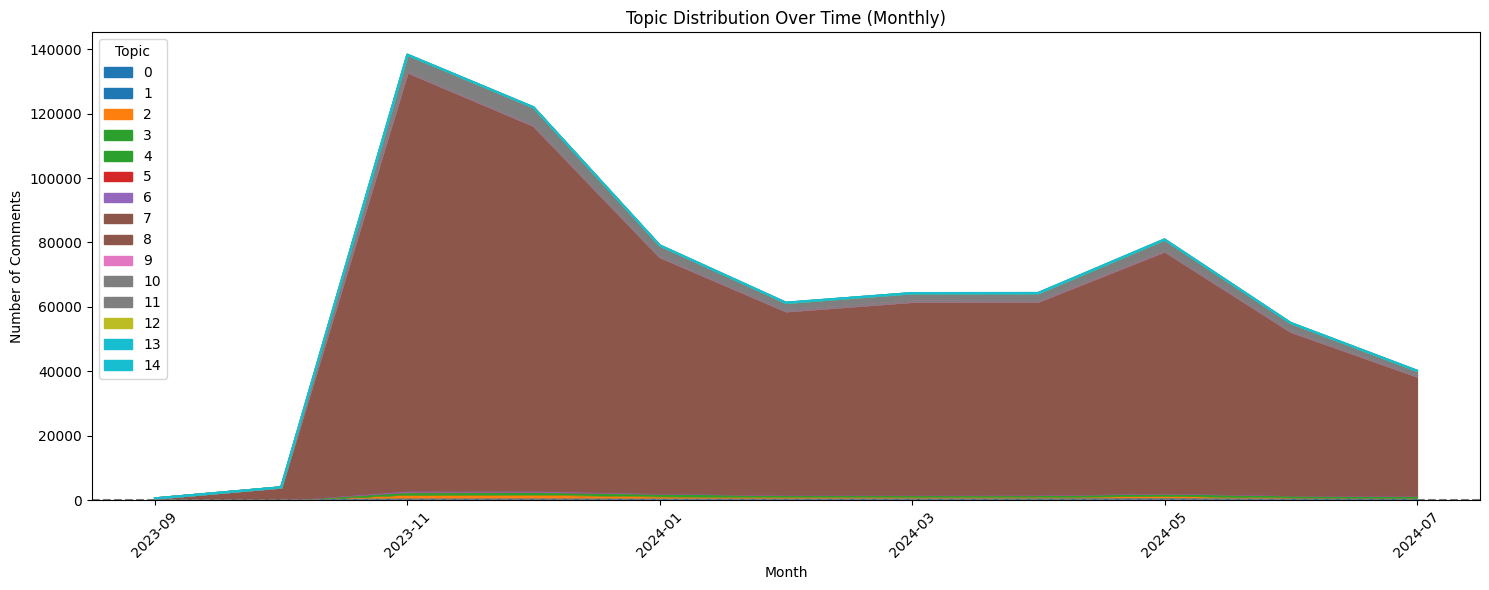

In [ ]:
ax = topic_time_df.plot(kind='area', 
                        stacked=True, 
                        cmap='tab10', 
                        figsize=(15,6),
                        title='Topic Distribution Over Time (Monthly)')

ax.set_xlabel('Month')
ax.set_ylabel('Number of Comments')
ax.legend(title='Topic', loc='upper left')
ax.axhline(0, color='gray', linestyle='--')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("topic_over_time_fixed.png", dpi=300)
plt.show()


In [ ]:
topic_core_war = topic_time_df[[6, 5]]

In [59]:
import matplotlib.cm as cm

/var/folders/n1/z1j67qb53g1g2y___dq2dhy00000gn/T/ipykernel_91368/925071005.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('Set2', len(topic_core_war.columns)).colors


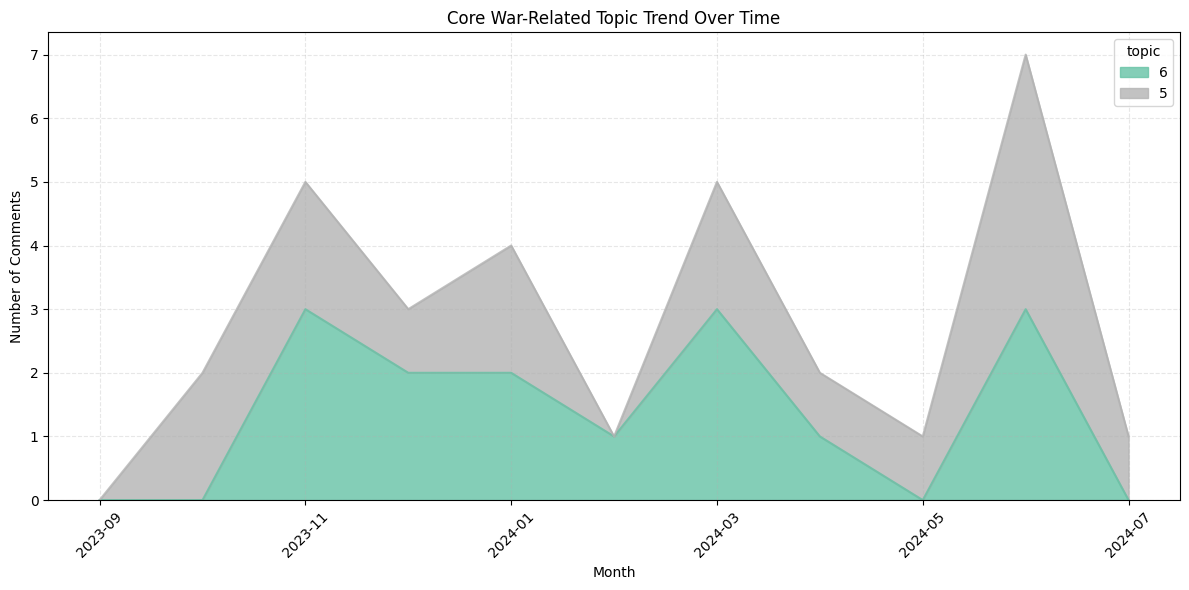

In [60]:
fig, ax = plt.subplots(figsize=(12, 6))
colors = cm.get_cmap('Set2', len(topic_core_war.columns)).colors
topic_core_war.plot(kind='area', 
                stacked=True, 
                color=colors, 
                alpha=0.8,
                ax=ax,
                title='Core War-Related Topic Trend Over Time')

ax.set_xlabel('Month')
ax.set_ylabel('Number of Comments')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.savefig("topic_core_war.png", dpi=300)
plt.show()


In [61]:
topic_media = topic_time_df[11]

/var/folders/n1/z1j67qb53g1g2y___dq2dhy00000gn/T/ipykernel_91368/1890969488.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('Set2', len(topic_core_war.columns)).colors


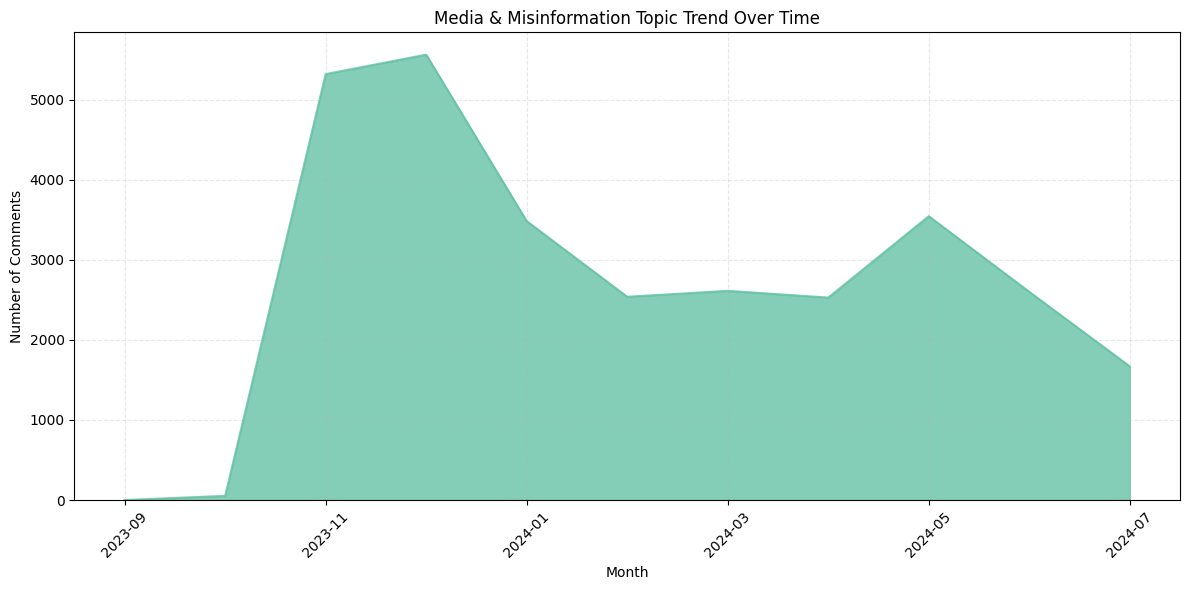

In [62]:
fig, ax = plt.subplots(figsize=(12, 6))
colors = cm.get_cmap('Set2', len(topic_core_war.columns)).colors
topic_media.plot(kind='area', 
                stacked=True, 
                color=colors, 
                alpha=0.8,
                ax=ax,
                title='Media & Misinformation Topic Trend Over Time')

ax.set_xlabel('Month')
ax.set_ylabel('Number of Comments')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.savefig("topic_meida.png", dpi=300)
plt.show()


<Figure size 1400x600 with 0 Axes>

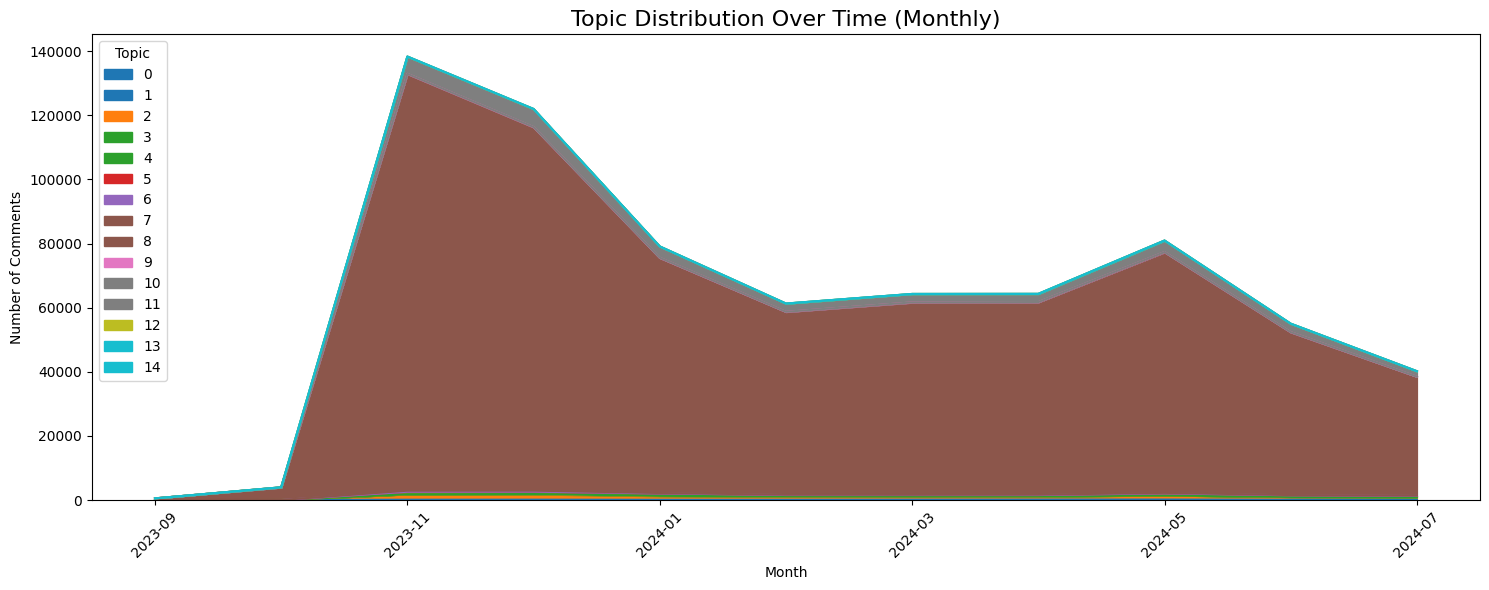

<Figure size 640x480 with 0 Axes>

In [63]:
# 堆叠面积图
plt.figure(figsize=(14, 6))
topic_time_df.plot(kind='area', stacked=True, cmap='tab10', figsize=(15,6))

plt.title('Topic Distribution Over Time (Monthly)', fontsize=16)
plt.xlabel('Month')
plt.ylabel('Number of Comments')
plt.xticks(rotation=45)
plt.legend(title='Topic', loc='upper left')
plt.tight_layout()
plt.show()
plt.savefig("topic_over_time1.png")

In [64]:
%matplotlib inline

month
2023-09-01       529
2023-10-01      3987
2023-11-01    138320
2023-12-01    121977
2024-01-01     79096
2024-02-01     61292
2024-03-01     64289
2024-04-01     64312
2024-05-01     80940
2024-06-01     55011
2024-07-01     42028
2024-08-01     47881
2024-09-01     56048
2024-10-01     58029
2024-11-01     39495
2024-12-01     34415
2025-01-01     36700
2025-02-01     27884
2025-03-01     19564
dtype: int64

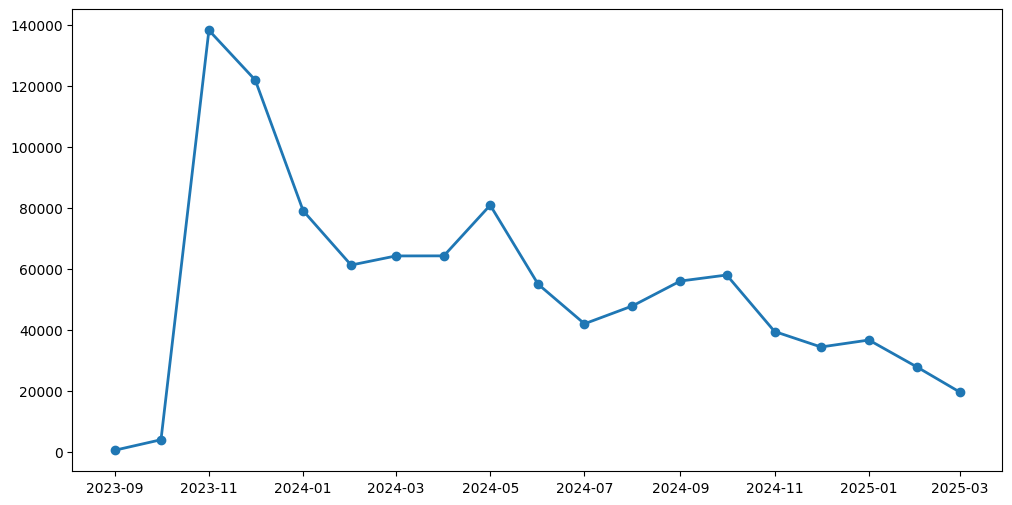

In [65]:
df['created_time'] = pd.to_datetime(df['created_time'])
df['month'] = df['created_time'].dt.to_period('M').astype(str)
monthly_comment_counts = df.groupby('month').size()
monthly_comment_counts.index = pd.to_datetime(monthly_comment_counts.index)
plt.figure(figsize=(12, 6))
plt.plot(monthly_comment_counts.index, monthly_comment_counts.values, marker='o', linewidth=2)
monthly_comment_counts

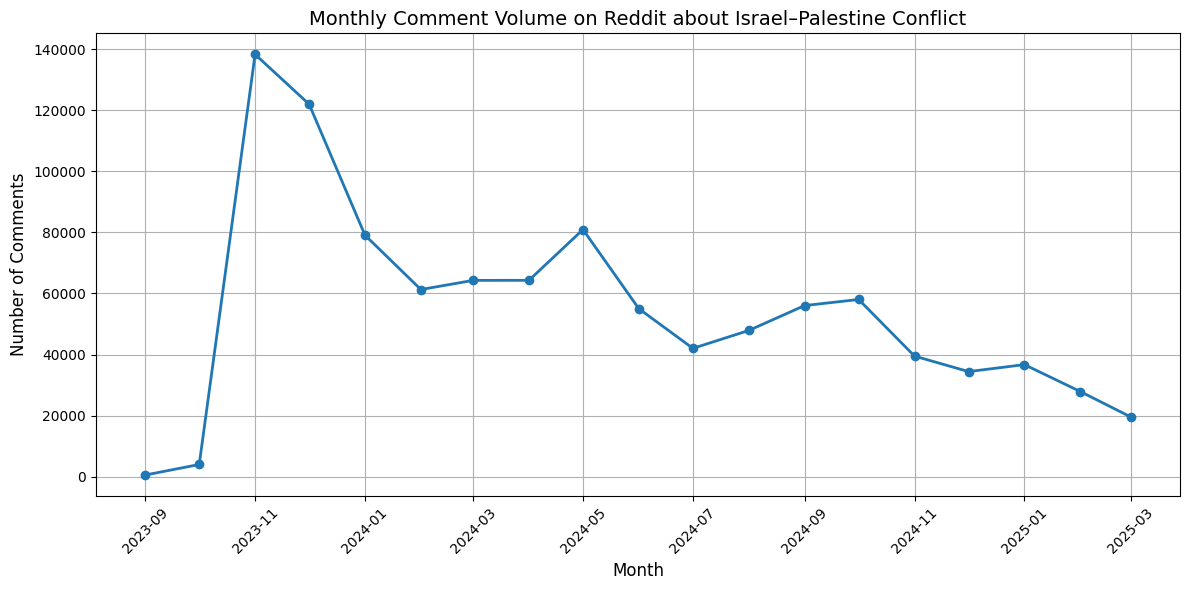

In [66]:
plt.figure(figsize=(12, 6))
plt.plot(monthly_comment_counts.index, monthly_comment_counts.values, marker='o', linewidth=2, color='tab:blue')
plt.title("Monthly Comment Volume on Reddit about Israel–Palestine Conflict", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Number of Comments", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)

# 设置日期格式
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# 自动调整边距以防遮挡
plt.tight_layout()
plt.savefig("monthly_comment_trend.png", dpi=300)
plt.show()
